# Baseline Models

In [1]:
import numpy as np
import pandas as pd
import pickle
import os

import statsmodels.api as sm
from sklearn import linear_model, neural_network
from sklearn import model_selection, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

import matplotlib.pyplot as plt

## Load data

In [2]:
def load_data():
    game_data_path = "data/neural_net_data/"
    files = os.listdir(game_data_path)

    with open(game_data_path + "2007-2008.pkl", 'rb') as f:
        X_train, y_train = pickle.load(f, encoding='latin1')

    # flatten X
    X_train = X_train.reshape(X_train.shape[0], -1)


    with open(game_data_path + "2008-2009.pkl", 'rb') as f:
        X_val, y_val = pickle.load(f, encoding='latin1')

    # flatten X
    X_val = X_val.reshape(X_val.shape[0], -1)

    with open(game_data_path + "2009-2010.pkl", 'rb') as f:
        X_test, y_test = pickle.load(f, encoding='latin1')

    # flatten X
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [3]:
X_train, y_train, X_val, y_val, X_test, y_test = load_data()

In [4]:
X_train.shape

(1267, 1524)

In [5]:
X_val.shape

(1266, 1524)

In [6]:
X_test.shape

(1263, 1524)

## 1. GLMs

In [7]:
# add bias
X_train_wConst = sm.add_constant(X_train)
X_val_wConst = sm.add_constant(X_val)
X_test_wConst = sm.add_constant(X_test)

### Negative Binomial

In [8]:
# Model may need interaction terms
neg_binom_model = sm.GLM(y_train, X_train_wConst, family=sm.families.NegativeBinomial()) # First pass responding variable, then matrix of features
neg_binom_results = neg_binom_model.fit()
print(neg_binom_results.summary())

/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1267
Model:                            GLM   Df Residuals:                      698
Model Family:        NegativeBinomial   Df Model:                          568
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7921.4
Date:                Sun, 09 Dec 2018   Deviance:                       292.14
Time:                        19:51:20   Pearson chi2:                     73.5
No. Iterations:                   100   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5687    123.780     -0.053      0.958    -249.173     236.035
x1            -0.2483      4.121     -0.060      0.9

### Poisson

In [9]:
# Can also try poisson regression
poisson_model = sm.GLM(y_train, X_train_wConst, family=sm.families.Poisson()) # First pass responding variable, then matrix of features
poisson_results = poisson_model.fit()
print(poisson_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1267
Model:                            GLM   Df Residuals:                      698
Model Family:                 Poisson   Df Model:                          568
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9314.9
Date:                Sun, 09 Dec 2018   Deviance:                       9820.8
Time:                        19:51:52   Pearson chi2:                 6.51e+03
No. Iterations:                   100   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.8172      8.964      3.103      0.002      10.249      45.386
x1             0.9060      0.298      3.036      0.0

## 2. Linear Regression

In [10]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_val)
# The coefficients
# print('Linreg Coefficients: \n', regr.coef_)
# The mean squared error
print("Linreg Mean squared error: %.2f"
      % metrics.mean_squared_error(y_val, y_pred))
# Explained variance score: 1 is perfect prediction
print('Linreg Variance score: %.2f' % metrics.r2_score(y_val, y_pred))

Linreg Mean squared error: 4591.37
Linreg Variance score: -4.81


### Adding LASSO 

/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso sweep results:


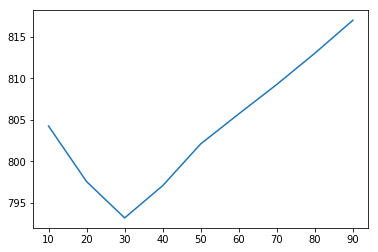

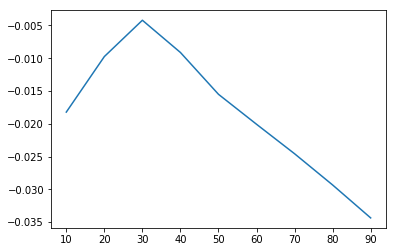

In [11]:
#0.1, 0.5, 1, 5, 10, 100, 
alphas = [10, 20, 30, 40, 50, 60, 70, 80, 90]#, 10000]
mses = []
r2s = []
for a in alphas:
    # Create LASSO
    regr = linear_model.Lasso(alpha = a)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_val)
    # The coefficients
    # print('Linreg Coefficients: \n', regr.coef_)
    
    mses.append(metrics.mean_squared_error(y_val, y_pred))
    r2s.append(metrics.r2_score(y_val, y_pred))

print("Lasso sweep results:")
plt.plot(alphas, mses)
plt.show()
plt.plot(alphas, r2s)
plt.show()

## 3. Random Forest

### Depth Sweep

In [12]:
# Sweep found best max depth = 10
depths = [4, 5, 6, 8, 10]
mses = []
r2s = []
for depth in depths:
    # Try random forests
    regr = RandomForestRegressor(n_estimators=50, max_depth=depth,
                                    random_state=2)
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_val)
    # The mean squared error
    print("-----")
    print("Depth of {} : ".format(depth))
    print("Random Forest Mean squared error: %.2f"
          % metrics.mean_squared_error(y_val, y_pred))
    mses.append(metrics.mean_squared_error(y_val, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Random Forest Variance score: %.2f' % metrics.r2_score(y_val, y_pred))
    r2s.append(metrics.r2_score(y_val, y_pred))

print("Random Forest depth sweep results:")
print(depths)
print(mses)
print(r2s)

-----
Depth of 2 : 
Random Forest Mean squared error: 806.56
Random Forest Variance score: -0.02
-----
Depth of 4 : 
Random Forest Mean squared error: 835.10
Random Forest Variance score: -0.06
-----
Depth of 5 : 
Random Forest Mean squared error: 851.15
Random Forest Variance score: -0.08
-----
Depth of 6 : 
Random Forest Mean squared error: 863.77
Random Forest Variance score: -0.09
-----
Depth of 8 : 
Random Forest Mean squared error: 890.04
Random Forest Variance score: -0.13
-----
Depth of 10 : 
Random Forest Mean squared error: 904.96
Random Forest Variance score: -0.15
Random Forest depth sweep results:
[2, 4, 5, 6, 8, 10]
[806.561956977998, 835.0977173528692, 851.1542517698883, 863.7703365714427, 890.0408331974671, 904.9602665097361]
[-0.021147712374251393, -0.0572754099126247, -0.07760378425106973, -0.09357637758103032, -0.12683613809975292, -0.14572488565961228]


### NTrees Sweep

In [8]:
# Sweep over num trees
ntrees = [20, 50, 100]
mses = []
r2s = []
for ntree in ntrees:
    # Try random forests
    regr = RandomForestRegressor(n_estimators=ntree, max_depth=5,
                                    random_state=2)
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_val)
    y_train_pred = regr.predict(X_train)
    print("-----")
    print("{} trees: ".format(ntree))
    
    print("Random Forest Train Mean squared error: %.2f"
          % metrics.mean_squared_error(y_train_pred, y_train))
    
    mses.append(metrics.mean_squared_error(y_train_pred, y_train))
    
    # The mean squared error
    print("Random Forest Val Mean squared error: %.2f"
          % metrics.mean_squared_error(y_val, y_pred))
    mses.append(metrics.mean_squared_error(y_val, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Random Forest Variance score: %.2f' % metrics.r2_score(y_val, y_pred))
    r2s.append(metrics.r2_score(y_val, y_pred))

print("Random Forest ntrees sweep results:")
print(ntrees)
print(mses)
print(r2s)

-----
20 trees: 
Random Forest Train Mean squared error: 971.51
Random Forest Val Mean squared error: 949.58
Random Forest Variance score: -0.20
-----
50 trees: 
Random Forest Train Mean squared error: 967.34
Random Forest Val Mean squared error: 917.61
Random Forest Variance score: -0.16
-----
100 trees: 
Random Forest Train Mean squared error: 955.10
Random Forest Val Mean squared error: 910.33
Random Forest Variance score: -0.15
Random Forest ntrees sweep results:
[20, 50, 100]
[971.5052449284518, 949.582278260031, 967.3364173620489, 917.6142390359272, 955.0992397565497, 910.3343203113709]
[-0.20221858068965637, -0.16174544674084745, -0.1525287061203202]


## 4. Feature Selection

In [14]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler2 = StandardScaler()
# Don't cheat - fit only on training data
scaler.fit(X_train)  
scaler2.fit(y_train[:,np.newaxis])
X_train = scaler.transform(X_train)  
y_train = scaler2.transform(y_train[:,np.newaxis]).squeeze()
# apply same transformation to test data
X_val = scaler.transform(X_val)
y_val = scaler2.transform(y_val[:,np.newaxis]).squeeze()
X_test = scaler.transform(X_test)  
y_test = scaler2.transform(y_test[:,np.newaxis]).squeeze()

/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/alexandrebucquet/anaconda2/envs/cs229proj/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### PCA

In [15]:
from sklearn.decomposition import PCA


def reduce_dims(n_dims):
    X_train, y_train, X_val, y_val, X_test, y_test = load_data()
    
    pca = PCA(n_components=n_dims)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)
#     print("Explained variance ratio:")
#     print(str(pca.explained_variance_ratio_))
#     print("")
    
    return X_train, y_train, X_val, y_val, X_test, y_test

### Rerun model with less features

#### MLP

In [16]:
X_train, y_train, X_val, y_val, X_test, y_test = reduce_dims(n_dims=30)

# Create linear regression object
regr = neural_network.MLPRegressor(solver='lbfgs', alpha=1e-5,
                                   activation = 'logistic', hidden_layer_sizes=(30,10),
                                   random_state=1)
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_val)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_val, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_val, y_pred))

Mean squared error: 839.84
Variance score: -0.06


#### Linear Regression

In [17]:
X_train, y_train, X_val, y_val, X_test, y_test = reduce_dims(n_dims=30)

alphas = [5, 10, 20, 100, 150]
mses = []
r2s = []
for a in alphas:
    # Create LASSO
    regr = linear_model.Lasso(alpha = a)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(X_val)
    # The coefficients
    # print('Linreg Coefficients: \n', regr.coef_)
    # The mean squared error
    print("-------")
    print("Alpha: {}".format(a))
    print("Linreg Mean squared error: %.2f"
          % metrics.mean_squared_error(y_val, y_pred))
    mses.append(metrics.mean_squared_error(y_val, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Linreg Variance score: %.2f' % metrics.r2_score(y_val, y_pred))
    r2s.append(metrics.r2_score(y_val, y_pred))
    print("Non-zero coefficients: {}".format(np.sum(regr.coef_ != 0)))
    print(regr.coef_[regr.coef_ != 0])

print("")
print("------")
print("Lasso sweep results:")
print(alphas)
print(mses)
print(r2s)

-------
Alpha: 5
Linreg Mean squared error: 840.67
Linreg Variance score: -0.06
Non-zero coefficients: 23
[ 0.00191587 -0.0995473   0.01403961 -0.00147293  0.00281216  0.02692482
  0.02250679 -0.0668282   0.12233479  0.06047271  0.07877217 -0.02598492
 -0.0494054   0.08004466  0.16515518 -0.00732497 -0.09069342  0.09193706
 -0.02583775  0.19164117  0.25527572 -0.00278848  0.1067855 ]
-------
Alpha: 10
Linreg Mean squared error: 823.14
Linreg Variance score: -0.04
Non-zero coefficients: 18
[ 0.00191464 -0.09698511  0.01064292  0.02296394  0.01847788 -0.05557367
  0.10840341  0.04379805  0.06114901 -0.00657154 -0.02837469  0.05833654
  0.14127633 -0.05799686  0.05710116  0.15333156  0.21332487  0.05575119]
-------
Alpha: 20
Linreg Mean squared error: 799.09
Linreg Variance score: -0.01
Non-zero coefficients: 13
[ 0.00191219 -0.09186073  0.00384955  0.01504217  0.01042007 -0.0330646
  0.08054066  0.01044873  0.02590268  0.01492026  0.09351864  0.07671177
  0.12942298]
-------
Alpha: 100
L